In [1]:
import gym
import numpy as np
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from collections import deque
from gym.spaces.box import Box
from gym.spaces.discrete import Discrete
from copy import deepcopy
from typing import List, Tuple, Dict
from gym import Space
import torch.multiprocessing as mp
from gym.vector import SyncVectorEnv, AsyncVectorEnv
from copy import deepcopy
import pandas as pd

In [2]:
from deeprl.common.utils import (
    net_gym_space_dims,
    discount_cumsum,
    to_torch,
    compute_td_deltas,
    compute_gae_and_v_targets,
    normalise_adv,
    init_envs,
    minibatch_split,
    layer_init,
    )
from deeprl.algos.a2c.a2c import A2C
from deeprl.algos.ppo.ppo import PPO
from deeprl.common.base import Network, Policy, CategoricalPolicy, GaussianPolicy, Critic

In [63]:
env_name = "CartPole-v1"

env = gym.make(env_name)

policy_layers = [
    (
        nn.Linear,
        {
            "in_features": net_gym_space_dims(env.observation_space),
            "out_features": 32,
        },
    ),
    (nn.Tanh, {}),
    (nn.Linear, {"in_features": 32, "out_features": 32}),
    (nn.Tanh, {}),
    (
        nn.Linear,
        {"in_features": 32, "out_features": net_gym_space_dims(env.action_space)},
    ),
]

critic_layers = [
    (
        nn.Linear,
        {
            "in_features": net_gym_space_dims(env.observation_space),
            "out_features": 32,
        },
    ),
    (nn.ReLU, {}),
    (nn.Linear, {"in_features": 32, "out_features": 32}),
    (nn.ReLU, {}),
    (nn.Linear, {"in_features": 32, "out_features": 1}),
]

cartpole_a2c_args = {
    "gamma": 0.99,
    "env_name": env_name,
    "step_lim": 500,
    "policy": CategoricalPolicy(policy_layers),
    "policy_optimiser": optim.Adam,
    "policy_lr": 0.002,
    "critic": Critic(critic_layers),
    "critic_lr": 0.002,
    "critic_optimiser": optim.Adam,
    "critic_criterion": nn.MSELoss(),
    "device": "cpu",
    "entropy_coef": 0.01,
    "n_interactions": 128,
    "num_train_passes": 8,
    "lam": 0.95,
    "num_eval_episodes": 15,
    "num_workers": 1,
    "minibatch_size": 256,
    "norm_adv": True,
    "multiprocess": False,
    "grad_clip_coef": 0.5,
    "loss_clip_coef": 0.2
    
}


```assert len(concat_batch["states"]) == agent.n_interactions * num_workers
assert len(concat_batch["next_states"]) == agent.n_interactions * num_workers
assert concat_batch["states"].dtype == torch.float32
assert concat_batch["rewards"].shape == (agent.n_interactions * num_workers,)
assert concat_batch["dones"].shape == (agent.n_interactions * num_workers,)
assert concat_batch["actions"].shape == (agent.n_interactions * num_workers,)
assert (not concat_batch["advantages"].requires_grad)````

In [60]:
env_name = "LunarLander-v2"
envs = gym.vector.make(env_name)
policy_layers = [
    (nn.Linear,
        {"in_features": net_gym_space_dims(envs.single_observation_space),
        "out_features": 128}),
    (nn.ReLU, {}),
    (nn.Linear,
        {"in_features": 128,
        "out_features": 64}),
    (nn.ReLU, {}),
    (nn.Linear,{"in_features": 64, "out_features": net_gym_space_dims(envs.single_action_space)}),
]

critic_layers = [
    (nn.Linear, {"in_features": net_gym_space_dims(envs.single_observation_space), "out_features": 128}),
    (nn.ReLU, {}),
    (nn.Linear,
        {"in_features": 128,
        "out_features": 64}),
    (nn.ReLU, {}),
    (nn.Linear, {"in_features": 64, "out_features": 1}),
]

lunar_lander_a2c_args = {
    "gamma": 0.99,
    "env_name": env_name,
    "step_lim": 500,
    "policy": CategoricalPolicy(policy_layers),
    "policy_optimiser": optim.Adam,
    "policy_lr": 0.0005,
    "critic": Critic(critic_layers),
    "critic_lr": 0.0005,
    "critic_optimiser": optim.Adam,
    "critic_criterion": nn.MSELoss(),
    "device": "cpu",
    "entropy_coef": 0.01,
    "n_interactions": 128,
    "num_train_passes": 10,
    "lam": 0.95,
    "num_eval_episodes": 15,
    "num_workers": 8,
    "minibatch_size": 256,
    "norm_adv": True,
    "multiprocess": False,
    "grad_clip_coef": 0.5,
    "loss_clip_coef": 0.2
}


In [68]:
agent = PPO(cartpole_a2c_args)

In [12]:
eval += eval_log2

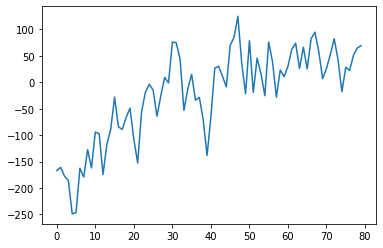

In [13]:
out = list(zip(*eval))

plt.plot(out[0])